In [2]:
# now for each trajectory, take these image ranges, and create a folder for each instance id with rgb, depth, robot_pos
# plug each folder into the pipeline - where we pick GT frames do label prop and train

from shutil import copyfile, rmtree
import json
import os
import matplotlib.pyplot as plt
import cv2

def acopyjson(a, b, r, ctr):
    with open(a, "r") as f:
        dat = json.load(f)
    
    new_dat = {}
    if os.path.isfile(b):
        with open(b, "r") as f:
            new_dat = json.load(f)
    
    for x in range(r[0], r[1]+1):
        new_dat.update({ctr: dat[str(x)]})
        ctr += 1
    with open(b, "w") as fp:
        json.dump(new_dat, fp)


def acopydir(a, b, ext, r, ctr):
#     print(f'acopydir {r}')
    if not os.path.isdir(b):
        os.makedirs(b)    
    for x in range(r[0], r[1]+1):
        f = "{:05d}{}".format(x, ext)
#         print(f)
        copyfile(os.path.join(a,f), os.path.join(b,"{:05d}{}".format(ctr, ext)))
        ctr += 1
    

data_dir = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019'

# Instance IDs we care about [193,404,196,172,243,133,129,170]
ids_we_care_about = [243,404,196,133,166,129,170,172] 

# traj_ranges = {
#     2: [(0,32), (32,41), (69,78), (207,234), (365,389), (466,589)],
#     3: [(115,173), (189,237), (334,397), (398,419)],
#     4: [(64,142), (387,447), (532,558)],
#     5: [(27,60), (77,93), (149,209), (210,234), (249,272), (317,409), (671,704)],
# }

traj_ranges_train = {
    243: [(4, (387, 447))], # closet door
    404: [(4,(64,142)), (8,(475,512)), (2, (32,41)), (2, (69,78))], #reading chair 4
    196: [(2,(466,589)), (3,(115,173)), (4,(143,165)),], #big couch 4
    133: [(5,(27,60))], #chair by the plant 2
    172: [(2, (207,234)), (3,(334,397)), (4,(532,558))], #chair in the corner 3
    166: [(2, (331,364)), (3,(294,306)), (8,(522,555))], #thing on top of desk in center room
#     129: [(2, (409,433)), (3,(9,29)), (4,(225,237))], #potted plant by stairs                        
    170: [(3,(189,237)), (4,(26,50))] #dining chair
#     fireplace: [(5,(317,409))]
#     microwave/dishwasher: [(8,(0,92)), (7,(0,61))]
}

traj_ranges_test = {
    243: [(7,(70,160))], # closet door
    404: [(5,(149,209))], #reading chair 4
    196: [(5,(210,234))], #big couch 4
    133: [(2,(365,389))], #chair by the plant 2
    172: [(8,(600,648))], #chair in the corner 3
    166: [(5,(61,76))], #thing on top of desk in center room
    129: [(5,(249,272))], #potted plant by stairs                        
    170: [(8,(122,158))] #dining chair
#     fireplace: [(5,(317,409))]
#     microwave/dishwasher: [(8,(0,92)), (7,(0,61))]
}

# traj_ranges_test = {
#     243: [(4, (387, 447)), (7,(70,160))], # closet door
#     404: [(4,(64,142)), (8,(475,512)), (2, (32,41)), (2, (69,78)), (5,(149,209))], #reading chair 4
#     196: [(2,(466,589)), (3,(115,173)), (4,(143,165)), (5,(210,234))], #big couch 4
#     133: [(5,(27,60)), (2,(365,389))], #chair by the plant 2
#     172: [(2, (207,234)), (3,(334,397)), (4,(532,558)), (8,(600,648))], #chair in the corner 3
#     166: [(2, (331,364)), (3,(294,306)), (8,(522,555)), (5,(61,76))], #thing on top of desk in center room
#     129: [(2, (409,433)), (3,(9,29)), (4,(225,237)), (5,(249,272))], #potted plant by stairs                        
#     170: [(3,(189,237)), (4,(26,50)), (8,(122,158))] #dining chair
# #     fireplace: [(5,(317,409))]
# #     microwave/dishwasher: [(8,(0,92)), (7,(0,61))]
# }

/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019/2/activeonly/rgb_dbg/00412.jpg
[  2  20  21  23  27  28  29  38  44  62  85  99 111 129 159 160 188 203
 224 236 273 297 302 353 355 410 455]


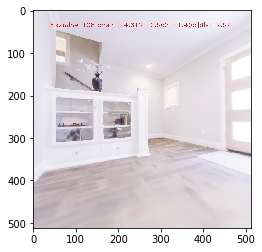

129


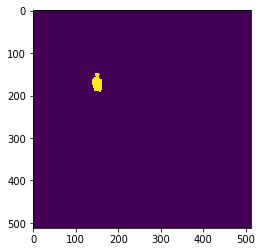

In [23]:
from shutil import copyfile, rmtree
import json
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

data_dir = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019'

traj = 2
src_img_indx = 412

# load the img_id, seg_path
img_path = os.path.join(data_dir, str(traj), 'activeonly', 'rgb_dbg', "{:05d}.jpg".format(src_img_indx))
seg_path = os.path.join(data_dir, str(traj), 'activeonly', 'seg', "{:05d}.npy".format(src_img_indx))
print(img_path
     )
annot = np.load(seg_path).astype(np.uint32)
print(np.unique(annot))
# cv2.cvtColor(cv2.imread(imgpath), cv2.COLOR_BGR2RGB)

im = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

plt.imshow(im)
plt.show()
for x in np.unique(annot):
    if x == 129:
        print(x)
        plt.imshow(annot==x)
        plt.show()

In [7]:
# traj_ranges = {
#     oven: []
# }


from shutil import rmtree


def collect_traj(out_dir, traj_ranges):
    if os.path.isdir(out_dir):
        print(f'rmtree {out_dir}')
        rmtree(out_dir)
    ctr = 0
    
    for inst, dets in traj_ranges.items():
        print(f'\ninstance_id {inst}, all_trajs {dets}')
        instance_count = 1
        for x in dets:
            traj = x[0]
            img_range = x[1]
            print(f'traj {traj}, img_range {img_range}')
            traj_dir = os.path.join(data_dir, str(traj), 'activeonly')
            print(traj_dir)

            if os.path.isdir(os.path.join(out_dir, 'rgb')):
                ctr = len(os.listdir(os.path.join(out_dir, 'rgb')))

            if os.path.isdir(os.path.join(out_dir, str(traj), str(inst))):
                instance_count = len(os.listdir(os.path.join(out_dir, str(traj), str(inst)))) + 1

            print(f'instance_count {instance_count}')
            # create traj/instance folder 
            instance_dir = os.path.join(out_dir, str(traj), str(inst), str(instance_count))
            print(f'making {instance_dir}')
            os.makedirs(instance_dir)

            # copy rgb, seg, depth and data.json
            acopydir(os.path.join(traj_dir, 'rgb'), os.path.join(instance_dir, 'rgb'), '.jpg', img_range, ctr)   
            acopydir(os.path.join(traj_dir, 'depth'), os.path.join(instance_dir, 'depth'), '.npy', img_range, ctr)
            acopydir(os.path.join(traj_dir, 'seg'), os.path.join(instance_dir, 'seg'), '.npy', img_range, ctr)
            acopyjson(os.path.join(traj_dir, 'data.json'), os.path.join(instance_dir, 'data.json'), img_range, ctr)

out_dir_train = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_traj_man_1116_train'
out_dir_test = '/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_traj_man_1116_test'

collect_traj(out_dir_train, traj_ranges_train)
collect_traj(out_dir_test, traj_ranges_test)


    
#     for i in range(len(ranges)):
#         print(i)
#         traj_out = os.path.join(out_dir, str(iid))
#         iid += 1
#         print(f'copying instance det {i} to {traj_out}')
#         if os.path.isdir(traj_out):
#             rmtree(traj_out)
#         os.makedirs(traj_out)
        
#         # copy rgb, seg, depth and data.json
#         acopydir(os.path.join(traj_dir, 'rgb'), os.path.join(traj_out, 'rgb'), '.jpg', ranges[i])   
#         acopydir(os.path.join(traj_dir, 'depth'), os.path.join(traj_out, 'depth'), '.npy', ranges[i])
#         acopydir(os.path.join(traj_dir, 'seg'), os.path.join(traj_out, 'seg'), '.npy', ranges[i])
#         acopyjson(os.path.join(traj_dir, 'data.json'), os.path.join(traj_out, 'data.json'), ranges[i])
        
#         # view 5 images from traj_out
#         fig, axs = plt.subplots(1, 5, figsize=(20,8), dpi=80)
#         imgs = os.listdir(os.path.join(traj_out, 'rgb'))
#         for x in range(5):
#             axs[x].imshow(cv2.cvtColor(cv2.imread(os.path.join(traj_out, 'rgb', imgs[x])), cv2.COLOR_BGR2RGB))
#             axs[x].set_title(imgs[x])
#         plt.show()
        

rmtree /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_traj_man_1116_train

instance_id 243, all_trajs [(4, (387, 447))]
traj 4, img_range (387, 447)
/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019/4/activeonly
instance_count 1
making /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_traj_man_1116_train/4/243/1

instance_id 404, all_trajs [(4, (64, 142)), (8, (475, 512)), (2, (32, 41)), (2, (69, 78))]
traj 4, img_range (64, 142)
/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019/4/activeonly
instance_count 1
making /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_traj_man_1116_train/4/404/1
traj 8, img_range (475, 512)
/checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/1633991019/8/activeonly
instance_count 1
making /checkpoint/apratik/data_devfair0187/apartment_0/straightline/no_noise/instance_traj_man_1116_tr